# Customer Personality Analysis
Customer Personality Analysis is one the most important applications of unsupervised learning. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base. In this machine learning project, we will make use of K-means clustering which is the essential algorithm for clustering unlabeled dataset. Before ahead in this project, learn what actually Customer Personality Analysis is.


# Data Preprocessing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,silhouette_score,davies_bouldin_score,calinski_harabasz_score


import warnings
warnings.filterwarnings('ignore')

#### Loading and Reading the Dataset.

In [7]:
data=pd.read_csv("marketing_campaign.csv")

In [8]:
# Displaying Fisrt 10 Records.
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [9]:
# Checking for Null or Missing Values in the data.
data.isnull().sum()   # Only Income has the Null values.

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.drop(columns=['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [12]:
num_cols=['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts',
          'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
          'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']


In [13]:
outliers_count={}
for col in num_cols:
    Q1=data[col].quantile(0.25)     # First quartile (25th percentile)
    Q3=data[col].quantile(0.75)     # Third quartile (75th percentile)
    IQR=Q3-Q1                       # Interquartile range
    lower_bound=Q1-1.5*IQR          # Lower bound for outliers
    upper_bound=Q3+1.5*IQR          # Upper bound for outliers

 # Identify outliers
    outliers=data[(data[col]<lower_bound) | (data[col]>upper_bound)]
    outliers_count[col]=len(outliers)  # Count of outliers

In [14]:
outliers_count

{'Income': 8,
 'Kidhome': 0,
 'Teenhome': 0,
 'Recency': 0,
 'MntWines': 35,
 'MntFruits': 227,
 'MntMeatProducts': 175,
 'MntFishProducts': 223,
 'MntSweetProducts': 248,
 'MntGoldProds': 207,
 'NumDealsPurchases': 86,
 'NumWebPurchases': 4,
 'NumCatalogPurchases': 23,
 'NumStorePurchases': 0,
 'NumWebVisitsMonth': 8}

In [15]:
data['Dt_Customer'].max()

'31-12-2013'

In [16]:
data['Age']=2014-data['Year_Birth']

In [17]:
# Creating new columns which calculates the total expenses,accepted coupons and place of purchase.
data['Tot_Expenses']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Tot_AcceptedCmp']=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']
data['Tot_Purchases']=data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumDealsPurchases']
data['Tot_Children']=data['Teenhome']+data['Kidhome']

In [18]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [19]:
ms={
    "Married": "Couple",
    "Together": "Couple",
    "Single": "Single",
    "Divorced": "Single",
    "Widow": "Single",
    "Alone": "Single",
    "Absurd": "Single",
    "YOLO": "Single"
}
data['Marital_Status']=data['Marital_Status'].map(ms)
data['Marital_Status'].value_counts()

Marital_Status
Couple    1444
Single     796
Name: count, dtype: int64

In [20]:
tam={"Couple": 2,"Single": 1}
data['Tot_adults']=data['Marital_Status'].map(tam)
data['Family_size']=data['Tot_adults']+data['Tot_Children']

In [21]:
data['Dt_Customer']=pd.to_datetime(data.Dt_Customer,format="%d-%m-%Y")
latest_date=data['Dt_Customer'].max()
data['Customer_Since']=(latest_date-data['Dt_Customer']).dt.days
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,Age,Tot_Expenses,Tot_AcceptedCmp,Tot_Purchases,Tot_Children,Tot_adults,Family_size,Customer_Since
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,1,57,1617,0,25,0,1,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,60,27,0,6,2,1,3,113
2,4141,1965,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,49,776,0,21,0,2,2,312
3,6182,1984,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,...,0,0,30,53,0,8,1,2,3,139
4,5324,1981,PhD,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,33,422,0,19,1,2,3,161


In [22]:
# Define new age bins and labels.
age_bins=[20,30,40,50,60,70,80,90]
age_labels=['20-30','30-40','40-50','50-60','60-70','70-80','80+']

# Create the 'Age_group' column with the new bins and labels.
data['Age_group']=pd.cut(data['Age'],bins=age_bins,labels=age_labels,right=False)

# Display the first few rows to confirm the new column
data[['Year_Birth','Age','Age_group']].head()

,Year_Birth,Age,Age_group
0,1957,57,50-60
1,1954,60,60-70
2,1965,49,40-50
3,1984,30,30-40
4,1981,33,30-40


In [23]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [24]:
data['Education']=data['Education'].replace(['Basic'],'Undergraduate')
data['Education']=data['Education'].replace(['2n Cycle','Master'],'Postgraduate')
data['Education']=data['Education'].replace(['Graduation'],'Graduate')

# Exploratory Data Analysis.

In [26]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Age,Tot_Expenses,Tot_AcceptedCmp,Tot_Purchases,Tot_Children,Tot_adults,Family_size,Customer_Since
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.009375,0.149107,45.194196,605.798214,0.297768,14.862054,0.950446,1.644643,2.595089,353.582143
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,37.000000,68.750000,0.000000,8.000000,0.000000,1.000000,2.000000,180.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,44.000000,396.000000,0.000000,15.000000,1.000000,2.000000,3.000000,355.500000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,55.000000,1045.500000,0.000000,21.000000,1.000000,2.000000,3.000000,529.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,121.000000,2525.000000,4.000000,44.000000,3.000000,2.000000,5.000000,699.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.096391,0.356274,11.984069,602.249288,0.678381,7.677173,0.751803,0.478728,0.906959,202.122512


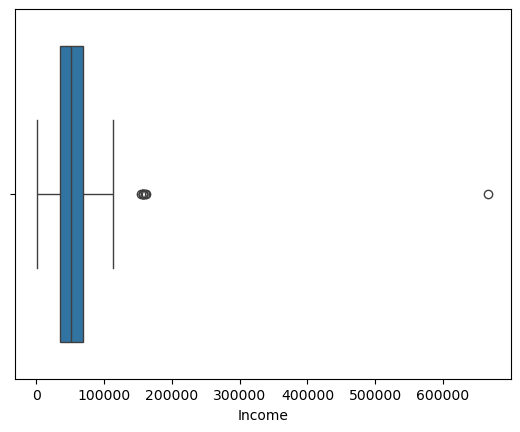

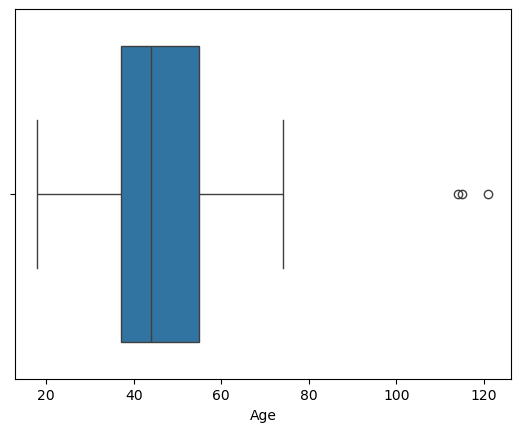

In [27]:
# Boxplot for 'Income'
sns.boxplot(x='Income',data=data)
plt.show()

# Boxplot for 'Age'
sns.boxplot(x='Age', data=data)
plt.show()

In [28]:
Q1=data[['Income','Age']].quantile(0.25)
Q3=data[['Income','Age']].quantile(0.75)
IQR=Q3-Q1
data=data[~((data[['Income','Age']]<(Q1 - 1.5 *IQR)) | (data[['Income','Age']]>(Q3 + 1.5*IQR))).any(axis=1)]

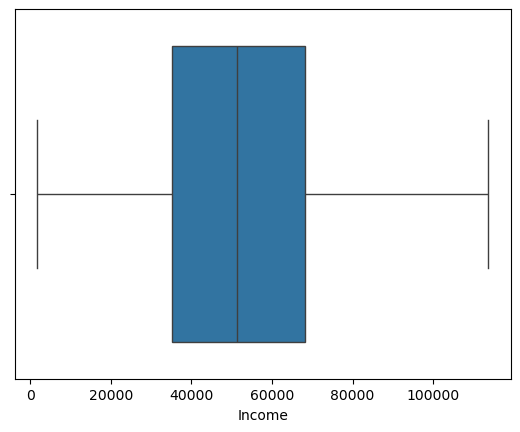

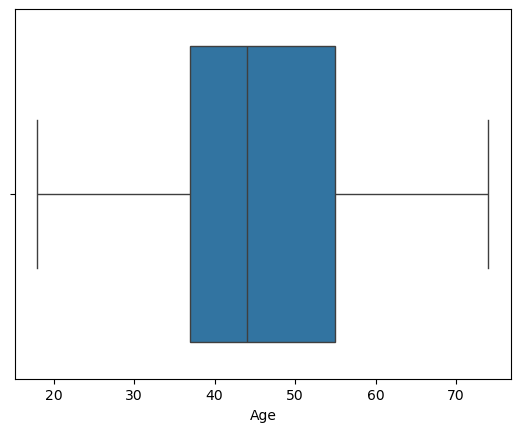

In [29]:
# Boxplot for 'Income'
sns.boxplot(x='Income',data=data)
plt.show()

# Boxplot for 'Age'
sns.boxplot(x='Age', data=data)
plt.show()

In [30]:
data1=data.copy()
data2=data.copy()
data3=data.copy()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Education            2229 non-null   object        
 3   Marital_Status       2229 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2229 non-null   int64         
 6   Teenhome             2229 non-null   int64         
 7   Dt_Customer          2229 non-null   datetime64[ns]
 8   Recency              2229 non-null   int64         
 9   MntWines             2229 non-null   int64         
 10  MntFruits            2229 non-null   int64         
 11  MntMeatProducts      2229 non-null   int64         
 12  MntFishProducts      2229 non-null   int64         
 13  MntSweetProducts     2229 non-null   i

In [32]:
data.drop(['ID','Year_Birth','Dt_Customer'],axis=1,inplace=True)

In [33]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Age,Tot_Expenses,Tot_AcceptedCmp,Tot_Purchases,Tot_Children,Tot_adults,Family_size,Customer_Since,Age_group
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,1,57,1617,0,25,0,1,1,663,50-60
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,60,27,0,6,2,1,3,113,60-70
2,Graduate,Couple,71613.0,0,0,26,426,49,127,111,...,0,49,776,0,21,0,2,2,312,40-50
3,Graduate,Couple,26646.0,1,0,26,11,4,20,10,...,0,30,53,0,8,1,2,3,139,30-40
4,PhD,Couple,58293.0,1,0,94,173,43,118,46,...,0,33,422,0,19,1,2,3,161,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Couple,61223.0,0,1,46,709,43,182,42,...,0,47,1341,0,18,1,2,3,381,40-50
2236,PhD,Couple,64014.0,2,1,56,406,0,30,0,...,0,68,444,1,22,3,2,5,19,60-70
2237,Graduate,Single,56981.0,0,0,91,908,48,217,32,...,0,33,1241,1,19,0,1,1,155,30-40
2238,Postgraduate,Couple,69245.0,0,1,8,428,30,214,80,...,0,58,843,0,23,1,2,3,156,50-60


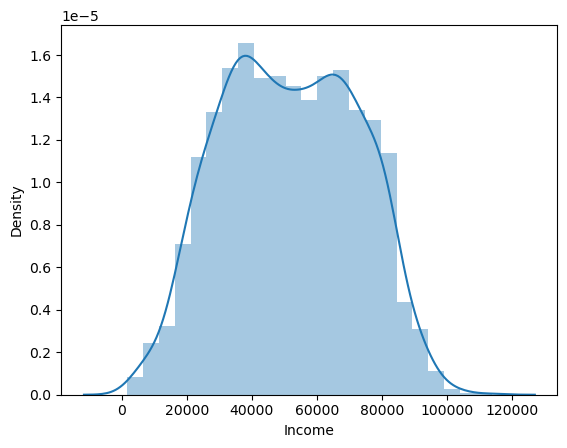

In [34]:
data['Income'].isnull().sum()
sns.distplot(data['Income'])
plt.show()

#### Handling Null or Missing Values.

In [36]:
data['Income'].fillna(data['Income'].mean(),inplace=True)

## Visualizations.

In [38]:
num_cols=data.select_dtypes(include=['int64','float64']).columns

In [39]:
num_cols

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Tot_Expenses',
       'Tot_AcceptedCmp', 'Tot_Purchases', 'Tot_Children', 'Tot_adults',
       'Family_size', 'Customer_Since'],
      dtype='object')

#### Distribution of Various Features

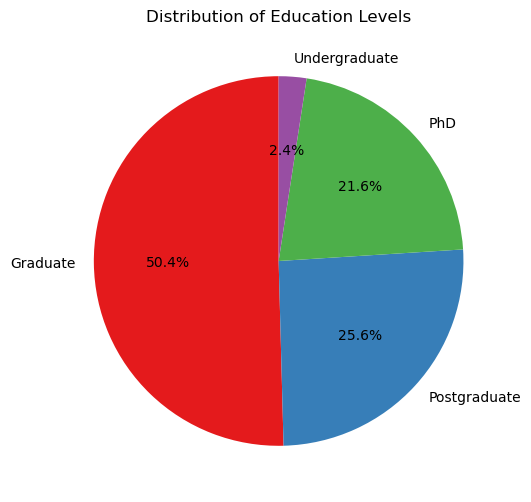

In [41]:
plt.figure(figsize=(6,6))
edu=data['Education'].value_counts()
edu.plot.pie(autopct='%1.1f%%',startangle=90,ylabel='',colors=sns.color_palette('Set1'))
plt.title('Distribution of Education Levels')
plt.show()

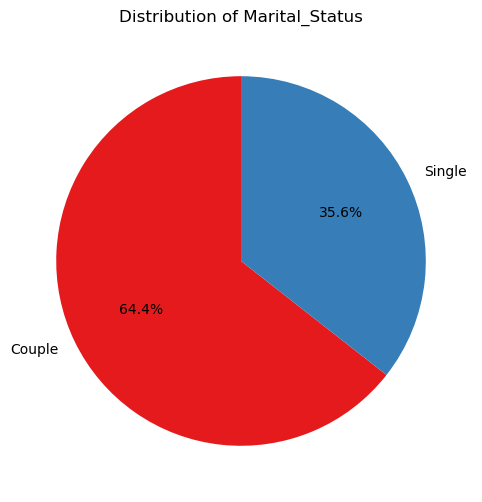

<Axes: title={'center': 'Distribution of Marital_Status'}, xlabel='Marital_Status', ylabel='count'>

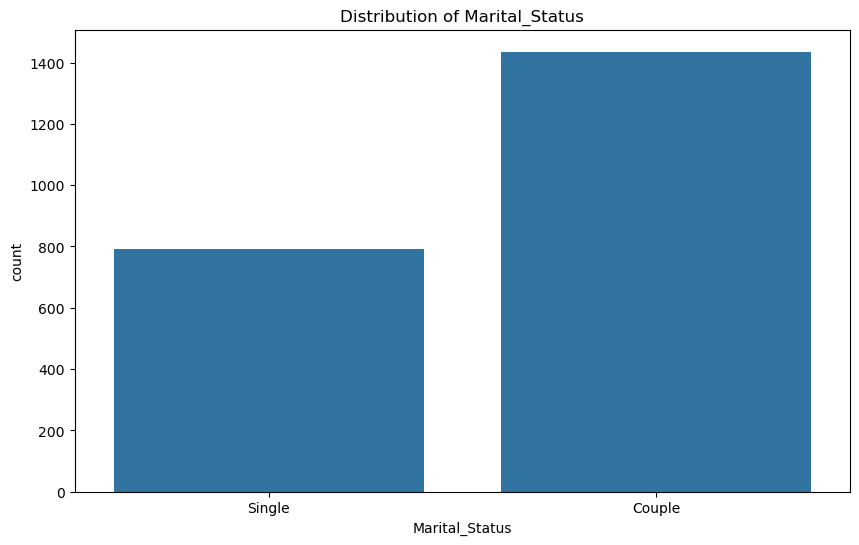

In [42]:
plt.figure(figsize=(6,6))
maris=data['Marital_Status'].value_counts()
maris.plot.pie(autopct='%1.1f%%',startangle=90,ylabel='',colors=sns.color_palette('Set1'))
plt.title('Distribution of Marital_Status')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Distribution of Marital_Status')
sns.countplot(data=data,x='Marital_Status')

### Feature Engineering.

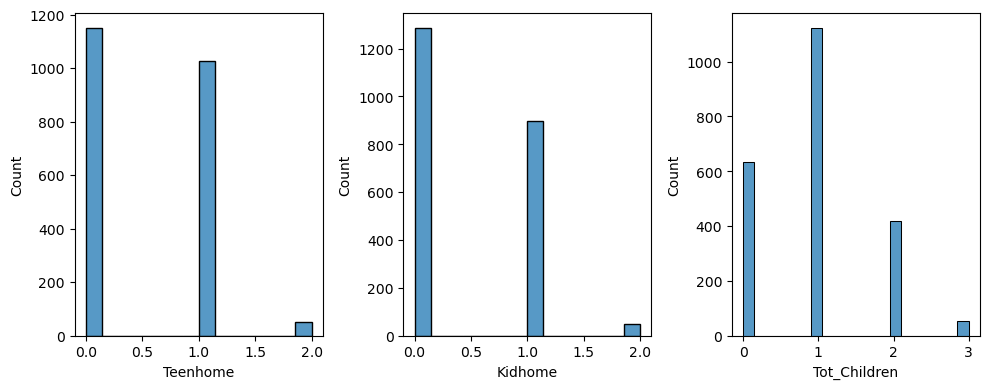

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,4))

sns.histplot(data['Teenhome'],ax=axes[0])
sns.histplot(data['Kidhome'],ax=axes[1])
sns.histplot(data['Tot_Children'],ax=axes[2])
plt.tight_layout()
plt.show()

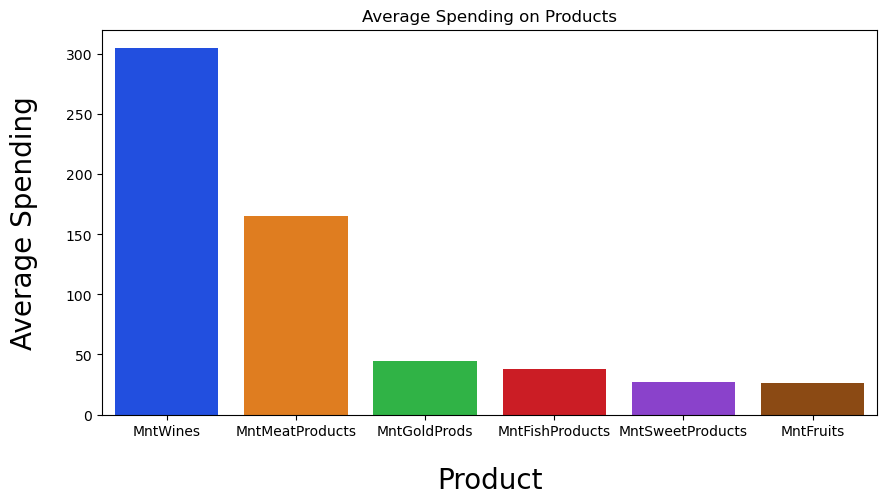

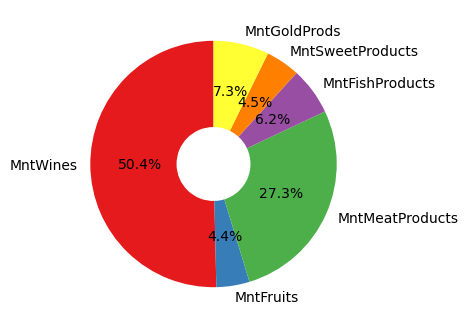

In [45]:
products=data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
product_means= products.mean(axis=0).sort_values(ascending=False)
product_means_df=pd.DataFrame(list(product_means.items()),columns=['Product','Average Spending'])

plt.figure(figsize=(10,5))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df,x='Product',y='Average Spending',palette=sns.color_palette("bright"));
plt.xlabel('Product',fontsize=20,labelpad=20)
plt.ylabel('Average Spending',fontsize=20,labelpad=20);


# Distribution of Products.
products=data.loc[:,['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
products_tot=products.sum()

# Products_tot
plt.figure(figsize=(4,4))
plt.pie(products_tot,labels=products_tot.index,wedgeprops={'width':0.7},textprops={'fontsize':10},autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set1'))
plt.show()

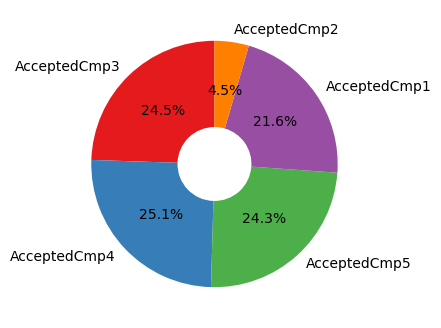

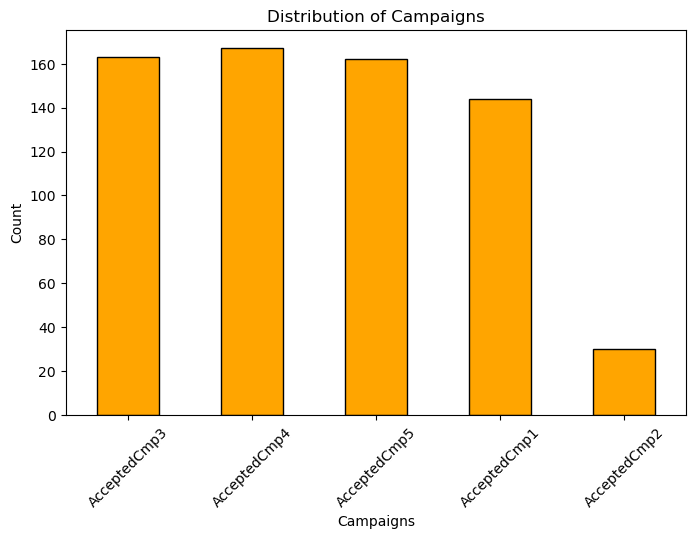

In [46]:
# Distribution of Promotion Acceptance.
promotion=data.loc[:,['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']]
promotion_tot=promotion.sum()

# Products_tot
plt.figure(figsize=(4,4))
plt.pie(promotion_tot,labels=promotion_tot.index,wedgeprops={'width':0.7},textprops={'fontsize':10},autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set1'))
plt.show()

plt.figure(figsize=(8, 5))
promotion_tot.plot.bar(color='orange',edgecolor='black')
plt.title('Distribution of Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

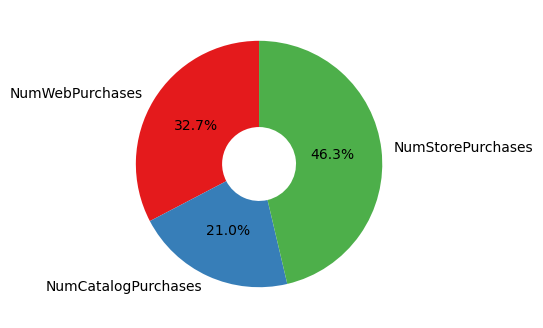

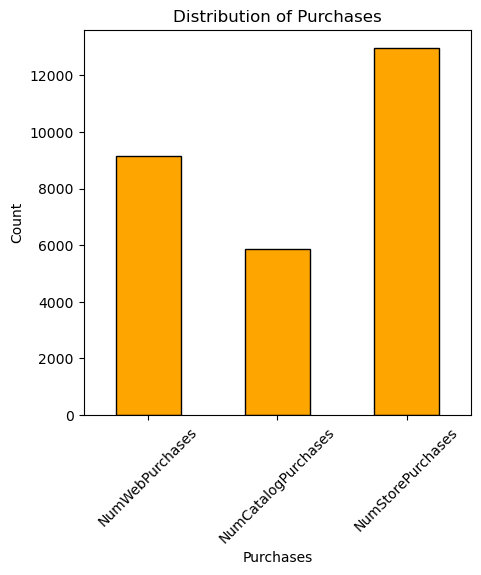

In [47]:
# Distribution of Places.
places=data.loc[:,[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]
places_tot=places.sum()

plt.figure(figsize=(4,4))
plt.pie(places_tot,labels=places_tot.index,wedgeprops={'width':0.7},textprops={'fontsize':10},autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set1'))
plt.show()

plt.figure(figsize=(5,5))
places_tot.plot.bar(color='orange',edgecolor='black')
plt.title('Distribution of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

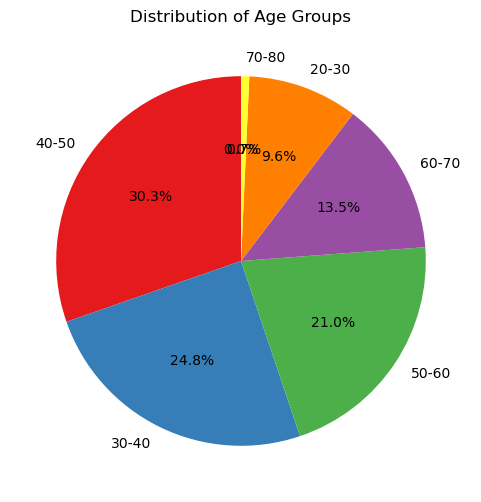

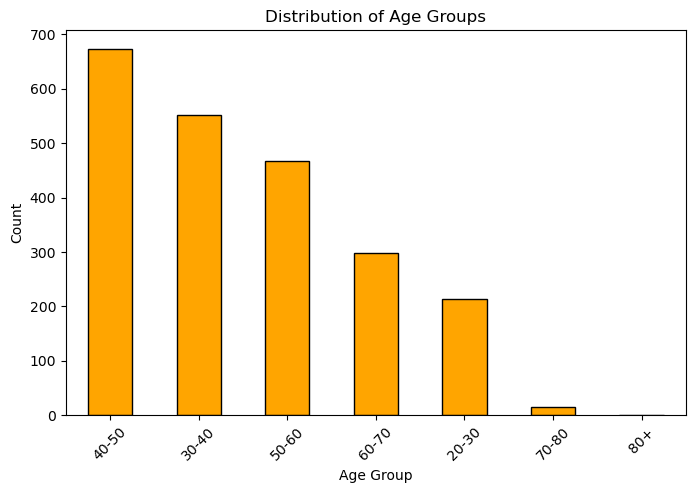

In [48]:
# Count the frequencies of each age group.
age_counts=data['Age_group'].value_counts()

# Plotting a Pie Chart for 'Age_group'
plt.figure(figsize=(6,6))
age_counts.plot.pie(autopct='%1.1f%%',startangle=90,ylabel='',colors=sns.color_palette('Set1'))
plt.title('Distribution of Age Groups')
plt.show()

# Plotting a Bar Chart for 'Age_group'
plt.figure(figsize=(8,5))
age_counts.plot.bar(color='orange',edgecolor='black')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Observation of Income with Age_group and Marital_status.

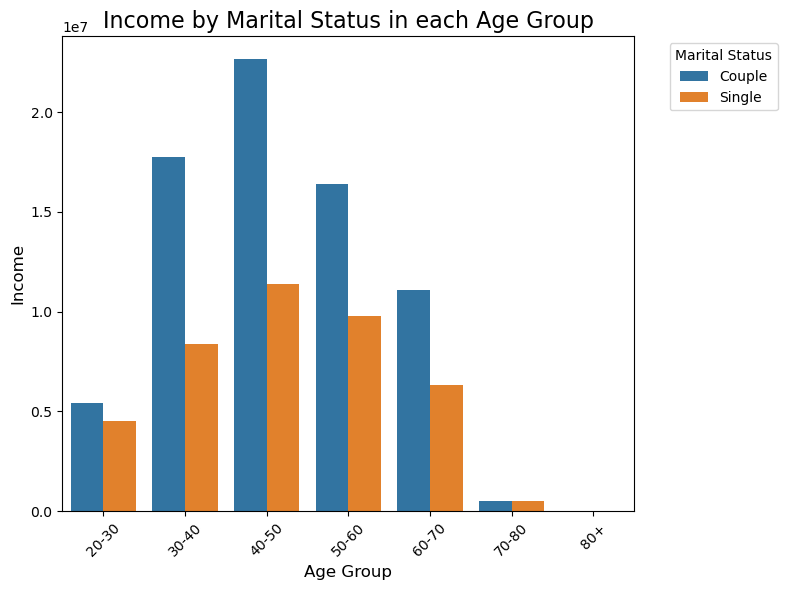

In [50]:
g1=data.groupby(['Age_group','Marital_Status'])['Income'].sum().reset_index().sort_values(by='Age_group')

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=g1,x='Age_group',y='Income',hue='Marital_Status')
ax.set_title('Income by Marital Status in each Age Group',fontsize=16)
ax.set_xlabel('Age Group',fontsize=12)
ax.set_ylabel('Income',fontsize=12)
ax.legend(title='Marital Status',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation of Income with Age_group and Education.

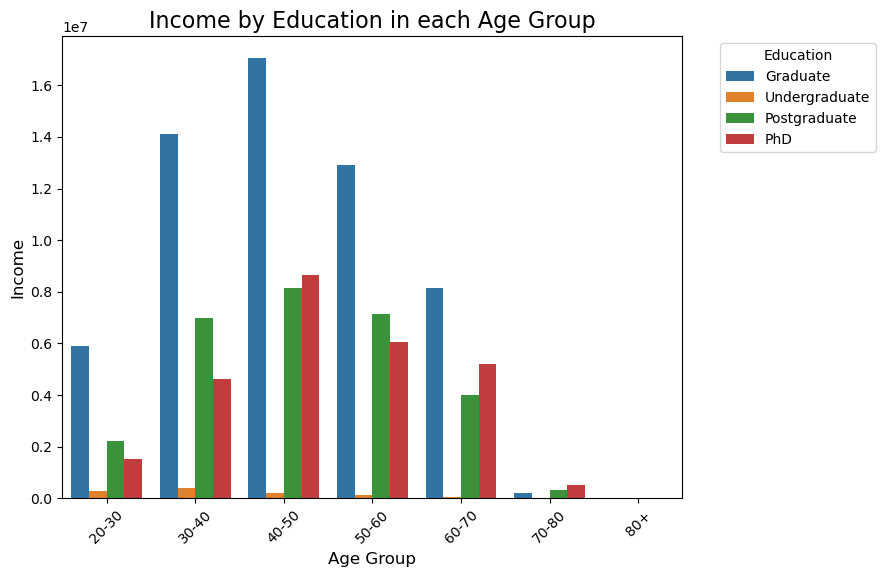

In [52]:
g2=data.groupby(['Education','Age_group'])['Income'].sum().reset_index().sort_values(by='Age_group')

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=g2,x='Age_group',y='Income',hue='Education')
ax.set_title('Income by Education in each Age Group',fontsize=16)
ax.set_xlabel('Age Group',fontsize=12)
ax.set_ylabel('Income',fontsize=12)
ax.legend(title='Education',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Calculating the Expenses according to children in each Age Group.

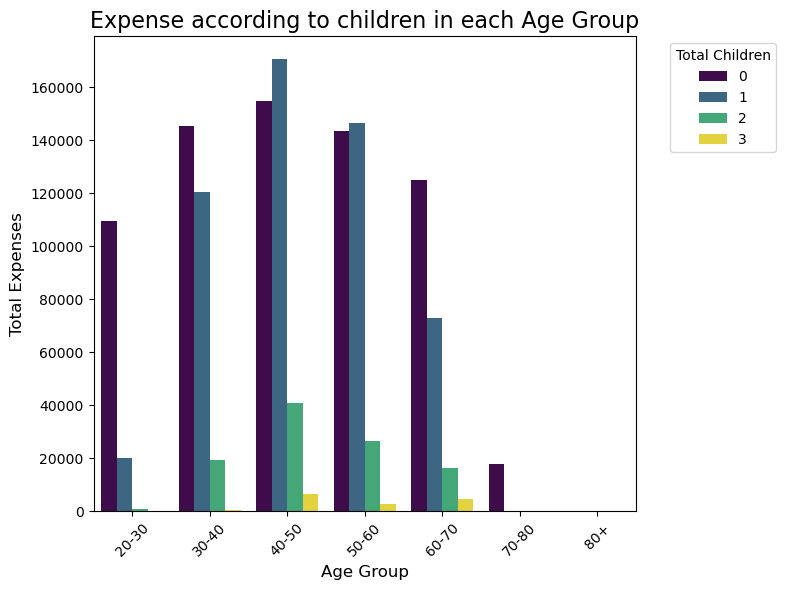

In [54]:
g3=data.groupby(['Tot_Children','Age_group'])['Tot_Expenses'].sum().reset_index().sort_values(by='Age_group')

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=g3,x='Age_group',y='Tot_Expenses',hue='Tot_Children',palette='viridis')
ax.set_title('Expense according to children in each Age Group',fontsize=16)
ax.set_xlabel('Age Group',fontsize=12)
ax.set_ylabel('Total Expenses',fontsize=12)
ax.legend(title='Total Children',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2229 non-null   object  
 1   Marital_Status       2229 non-null   object  
 2   Income               2229 non-null   float64 
 3   Kidhome              2229 non-null   int64   
 4   Teenhome             2229 non-null   int64   
 5   Recency              2229 non-null   int64   
 6   MntWines             2229 non-null   int64   
 7   MntFruits            2229 non-null   int64   
 8   MntMeatProducts      2229 non-null   int64   
 9   MntFishProducts      2229 non-null   int64   
 10  MntSweetProducts     2229 non-null   int64   
 11  MntGoldProds         2229 non-null   int64   
 12  NumDealsPurchases    2229 non-null   int64   
 13  NumWebPurchases      2229 non-null   int64   
 14  NumCatalogPurchases  2229 non-null   int64   
 15  NumStorePurchases    2229 

In [56]:
# Removing the unused columns from the data.
del_cols=['Age_group','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts',
          'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
          'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
          'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
          'AcceptedCmp1','AcceptedCmp2']
data_cleaned=data.drop(columns=del_cols,axis=1)

In [57]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        2229 non-null   object 
 1   Marital_Status   2229 non-null   object 
 2   Income           2229 non-null   float64
 3   Recency          2229 non-null   int64  
 4   Complain         2229 non-null   int64  
 5   Response         2229 non-null   int64  
 6   Age              2229 non-null   int64  
 7   Tot_Expenses     2229 non-null   int64  
 8   Tot_AcceptedCmp  2229 non-null   int64  
 9   Tot_Purchases    2229 non-null   int64  
 10  Tot_Children     2229 non-null   int64  
 11  Tot_adults       2229 non-null   int64  
 12  Family_size      2229 non-null   int64  
 13  Customer_Since   2229 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 261.2+ KB


In [58]:
# Label encoding for the categorical columns.
le=LabelEncoder()
data_cleaned['Education']=le.fit_transform(data['Education'])
data_cleaned['Marital_Status']=le.fit_transform(data['Marital_Status'])

In [59]:
# Scaling numeric features for clustering.
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_cleaned)

### Data Splitting.

In [61]:
target=['Response']
X=data_cleaned.drop(['Response'],axis=1)
y=data_cleaned[target]

In [62]:
# Train-Test Split.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [63]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Unsupervised Learning.

### K-Means
K-means clustering is a popular method for grouping data by assigning observations to clusters based on proximity to the cluster’s center. This article explores k-means clustering, its importance, applications, and workings, providing a clear understanding of its role in data analysis.

In [66]:
# Using the Elbow method to find the optimal number of clusters.
inertia=[]
cluster_range=range(1,11)  # Test of 1 to 10 clusters.

for k in cluster_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

#### Elbow Method :
The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.

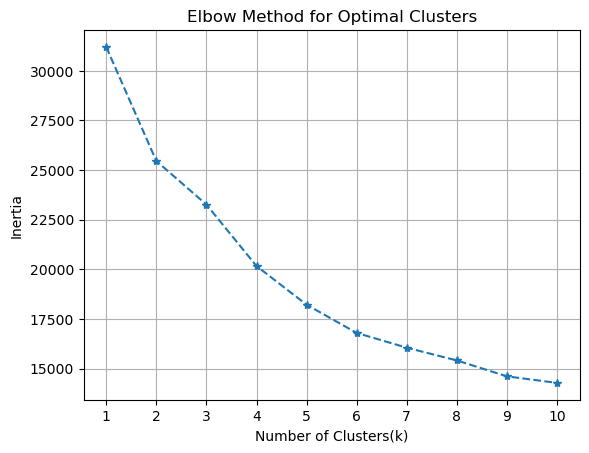

In [68]:
# Plotting the Elbow curve.
plt.plot(cluster_range,inertia,marker='*',linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [69]:
# Choose the optimal number of clusters.
opt_k=4
kmeans=KMeans(n_clusters=opt_k,random_state=42)
labels=kmeans.fit_predict(data_scaled)

In [70]:
# Evaluation Metrics.
silhouette=silhouette_score(data_scaled,labels)
davies_bouldin=davies_bouldin_score(data_scaled,labels)


print(f"Silhouette Score:{silhouette:.4f}")
print(f"Davies-Bouldin Index:{davies_bouldin:.4f}")

Silhouette Score:0.1900
Davies-Bouldin Index:1.4268


### Agglomerative Clustering.

In [72]:
# Agglomerative Clustering.
agg_cluster=AgglomerativeClustering(n_clusters=4,linkage='ward')
labels_agg=agg_cluster.fit_predict(data_scaled)

silhouette_agg=silhouette_score(data_scaled,labels_agg)
print(f"Agglomerative Clustering Silhouette Score:{silhouette_agg:.4f}")

Agglomerative Clustering Silhouette Score:0.1563


### Gaussian Mixture Model (GMM)

In [74]:
# Gaussian Mixture Clustering.
gmm=GaussianMixture(n_components=4,random_state=42)
labels_gmm=gmm.fit_predict(data_scaled)

# Silhouette Score
silhouette_gmm=silhouette_score(data_scaled,labels_gmm)
print(f"Gaussian Mixture Silhouette Score:{silhouette_gmm:.4f}")

Gaussian Mixture Silhouette Score:0.2040


### DBSCAN

In [76]:
# DBSCAN
dbscan=DBSCAN(eps=0.5, min_samples=2)
labels=dbscan.fit_predict(data_scaled)

# Silhouette Score
sil_score=silhouette_score(data_scaled,labels,metric='euclidean')
print(f"DBSCAN Silhouette Score: {sil_score}")

DBSCAN Silhouette Score: -0.3263876894739597


## Supervised Learninng.
### Random Forest Model.

In [78]:
# Train Random Forest Model.
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
# Evaluate Model.
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)

print(f"Random Forest Model Accuracy Score:{accuracy:.4f}")
print(f"Classification report:{report}")

Random Forest Model Accuracy Score:0.8879
Classification report:              precision    recall  f1-score   support

           0       0.91      0.97      0.94       570
           1       0.70      0.42      0.53        99

    accuracy                           0.89       669
   macro avg       0.80      0.70      0.73       669
weighted avg       0.88      0.89      0.88       669



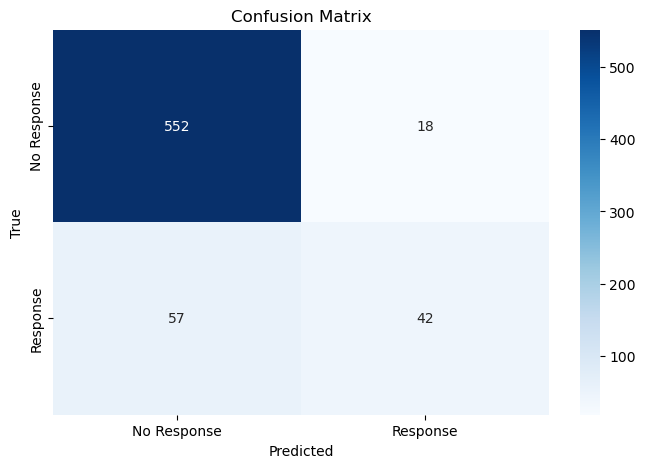

In [79]:
# Plot Confusion Matrix.
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['No Response','Response'],yticklabels=['No Response','Response'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [80]:
import pickle
pickle.dump(model,open('CPA_model.pkl','wb'))

In [5]:
pip install scikit-learn==0.24.2


     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ----- ---------------------------------- 1.0/7.5 MB 7.2 MB/s eta 0:00:01
     ------ --------------------------------- 1.3/7.5 MB 6.1 MB/s eta 0:00:02
     ------------ --------------------------- 2.4/7.5 MB 4.1 MB/s eta 0:00:02
     ---------------- ----------------------- 3.1/7.5 MB 4.0 MB/s eta 0:00:02
     ------------------ --------------------- 3.4/7.5 MB 4.0 MB/s eta 0:00:02
     ---------------------- ----------------- 4.2/7.5 MB 3.6 MB/s eta 0:00:01
     -------------------------- ------------- 5.0/7.5 MB 3.6 MB/s eta 0:00:01
     ------------------------------ --------- 5.8/7.5 MB 3.7 MB/s eta 0:00:01
     ------------------------------------ --- 6.8/7.5 MB 3.7 MB/s eta 0:00:01
     ---------------------------------------- 7.5/7.5 MB 3.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'don

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [20 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\khale\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
      return hook(metad